In [640]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [641]:
a=[1,2,3]
np.mean(a)

np.float64(2.0)

LOAD THE DATASET

In [642]:
train=pd.read_csv("/Users/ASUS/Downloads/titanic/train.csv")
test=pd.read_csv("/Users/ASUS/Downloads/titanic/test.csv")

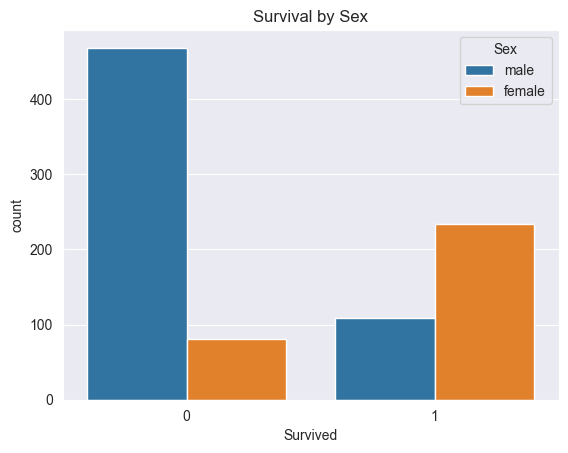

In [643]:
# Count plot with Seaborn
sns.countplot(x='Survived', hue='Sex', data=train)
plt.title('Survival by Sex')
plt.show()


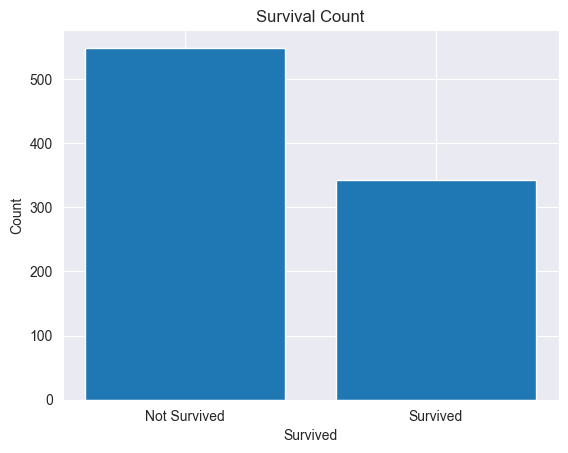

In [644]:
# Bar chart with Matplotlib
survived_counts = train['Survived'].value_counts()
plt.bar(survived_counts.index, survived_counts.values)
plt.xticks([0, 1], ['Not Survived', 'Survived'])
plt.title('Survival Count')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()


 📊 Quick Data Overview

In [645]:
train.head()
var = train.shape
train.info()
train.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Handle Missing Values

In [646]:
# Fill missing Age with median
train['Age'] = train['Age'].fillna(train['Age'].median())
test['Age'] = test['Age'].fillna(train['Age'].median())

# Fill missing Fare in test with median
test['Fare'] = test['Fare'].fillna(test['Fare'].median())

# Fill missing Embarked with mode
train['Embarked'] = train['Embarked'].fillna(train['Embarked'].mode()[0])
test['Embarked'] = test['Embarked'].fillna(train['Embarked'].mode()[0])

Feature Engineering

In [647]:
# Create Family_Size and Is_Alone
for df in [train, test]:
    df['Family_Size'] = df['SibSp'] + df['Parch'] + 1
    df['Is_Alone'] = df['Family_Size'].apply(lambda x: 1 if x == 1 else 0)

# Extract Title from Name
for df in [train, test]:
    df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
    df['Title'] = df['Title'].replace(['Lady', 'Countess', 'Capt', 'Col', 'Don',
                                       'Dr', 'Major', 'Rev', 'Sir', 'Honker', 'Dona'], 'Rare')
    df['Title'] = df['Title'].replace({'Mlle': 'Miss', 'Ms': 'Miss', 'Mme': 'Mrs'})

 Drop Unnecessary Columns

In [648]:
drop_cols = ['PassengerId', 'Name', 'Ticket', 'Cabin']

train.drop(columns=[col for col in drop_cols if col in train.columns], inplace=True)
test.drop(columns=[col for col in drop_cols if col in test.columns], inplace=True)

Data Preprocessing

In [649]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Encode categorical columns
le = LabelEncoder()
for col in ['Sex', 'Embarked', 'Title']:
    train[col] = le.fit_transform(train[col])

# Scale numeric columns
scaler = StandardScaler()
train[['Age', 'Fare', 'Family_Size']] = scaler.fit_transform(train[['Age', 'Fare', 'Family_Size']])

# Final feature and target split
X = train[['Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'Family_Size', 'Is_Alone', 'Title']]
y = train['Survived']


Split And Test Data

In [650]:
from sklearn.model_selection import train_test_split

X = train.drop('Survived', axis=1)
y = train['Survived']
X = X.drop(['SibSp', 'Parch'], axis=1)

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

Model Making We Use Multiple Ml Algorithm For Prediction

1. Logistic Regression

In [651]:
from sklearn.linear_model import LogisticRegression

model=LogisticRegression()
model.fit(X_train,y_train)
lr_pred=model.predict(X_test)

In [652]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
accuracy_score(y_test,lr_pred)

0.8044692737430168

In [653]:
confusion_matrix(y_test,lr_pred)

array([[90, 15],
       [20, 54]])

In [654]:
print(classification_report(y_test,lr_pred))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84       105
           1       0.78      0.73      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.80      0.80      0.80       179



2. Navies Bayes

In [655]:
from sklearn.naive_bayes import GaussianNB
model1=GaussianNB()
model1.fit(X_train,y_train)
nb_pred=model1.predict(X_test)

In [656]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
accuracy_score(y_test,nb_pred)

0.7821229050279329

In [657]:
confusion_matrix(y_test,nb_pred)

array([[82, 23],
       [16, 58]])

In [658]:
print(classification_report(y_test,nb_pred))

              precision    recall  f1-score   support

           0       0.84      0.78      0.81       105
           1       0.72      0.78      0.75        74

    accuracy                           0.78       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.79      0.78      0.78       179



3. KNN

In [659]:
from  sklearn.neighbors import KNeighborsClassifier
model2=KNeighborsClassifier(n_neighbors=5)
model2.fit(X_train,y_train)
knn_pred=model2.predict(X_test)

In [660]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
accuracy_score(y_test,knn_pred)

0.7653631284916201

In [661]:
confusion_matrix(y_test,knn_pred)

array([[83, 22],
       [20, 54]])

In [662]:
print(classification_report(y_test,knn_pred))

              precision    recall  f1-score   support

           0       0.81      0.79      0.80       105
           1       0.71      0.73      0.72        74

    accuracy                           0.77       179
   macro avg       0.76      0.76      0.76       179
weighted avg       0.77      0.77      0.77       179



4. Decision Tree

In [663]:
from sklearn.tree import DecisionTreeClassifier
model3=DecisionTreeClassifier(random_state=42)
model3.fit(X_train,y_train)
dt_pred=model3.predict(X_test)

In [664]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
accuracy_score(y_test,dt_pred)

0.7821229050279329

In [665]:
confusion_matrix(y_test,dt_pred)

array([[85, 20],
       [19, 55]])

In [666]:
print(classification_report(y_test,dt_pred))

              precision    recall  f1-score   support

           0       0.82      0.81      0.81       105
           1       0.73      0.74      0.74        74

    accuracy                           0.78       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.78      0.78      0.78       179



5. SVM

In [667]:
from sklearn.svm import SVC
model4=SVC(kernel='rbf',random_state=42)
model4.fit(X_train,y_train)
svm_pred=model4.predict(X_test)

In [668]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
accuracy_score(y_test,svm_pred)

0.8044692737430168

In [669]:
confusion_matrix(y_test,svm_pred)

array([[90, 15],
       [20, 54]])

In [670]:
print(classification_report(y_test,svm_pred))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84       105
           1       0.78      0.73      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.80      0.80      0.80       179



Fine Tunnning

In [671]:
from sklearn.model_selection import GridSearchCV
# Logistic Regression
log_params = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l2'],
    'solver': ['liblinear', 'lbfgs']
}

# KNN
knn_params = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Decision Tree
dt_params = {
    'max_depth': [3, 5, 7, 9, None],
    'criterion': ['gini', 'entropy'],
    'min_samples_split': [2, 5, 10]
}

# Naive Bayes
nb_params = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6]
}

# For Grid Search
svm_param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.001, 0.01, 0.1, 1],
    'kernel': ['rbf']
}

In [672]:
# Logistic Regression
log_grid = GridSearchCV(LogisticRegression(), log_params, cv=5)
log_grid.fit(X_train, y_train)

# KNN
knn_grid = GridSearchCV(KNeighborsClassifier(), knn_params, cv=5)
knn_grid.fit(X_train, y_train)

# Decision Tree
dt_grid = GridSearchCV(DecisionTreeClassifier(), dt_params, cv=5)
dt_grid.fit(X_train, y_train)

# Naive Bayes
nb_grid = GridSearchCV(GaussianNB(), nb_params, cv=5)
nb_grid.fit(X_train, y_train)

#SVM
svm_grid = GridSearchCV(SVC(), svm_param_grid, cv=5)
svm_grid.fit(X_train, y_train)

,estimator,SVC()
,param_grid,"{'C': [0.1, 1, ...], 'gamma': [0.001, 0.01, ...], 'kernel': ['rbf']}"
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,C,100


In [675]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

svm_param_dist = {
    'C': uniform(0.1, 100),          # Search C in range 0.1 to 100
    'gamma': uniform(0.001, 1),      # Search gamma in range 0.001 to 1
    'kernel': ['rbf']                # Use RBF kernel only
}
# Logistic Regression
log_random = RandomizedSearchCV(LogisticRegression(), log_params, n_iter=10, cv=5, random_state=42)
log_random.fit(X_train, y_train)

# KNN
knn_random = RandomizedSearchCV(KNeighborsClassifier(), knn_params, n_iter=10, cv=5, random_state=42)
knn_random.fit(X_train, y_train)

# Decision Tree
dt_random = RandomizedSearchCV(DecisionTreeClassifier(), dt_params, n_iter=10, cv=5, random_state=42)
dt_random.fit(X_train, y_train)

# Naive Bayes
nb_random = RandomizedSearchCV(GaussianNB(), nb_params, n_iter=4, cv=5, random_state=42)
nb_random.fit(X_train, y_train)

#SVM
svm_random = RandomizedSearchCV(SVC(), svm_param_dist, n_iter=20, cv=5, random_state=42)
svm_random.fit(X_train, y_train)

,estimator,SVC()
,param_distributions,"{'C': <scipy.stats....0012EA43F65D0>, 'gamma': <scipy.stats....0012EA46435C0>, 'kernel': ['rbf']}"
,n_iter,20
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,random_state,42
,error_score,nan


In [676]:
print("=== GridSearchCV Results ===")
print("Logistic Regression:", log_grid.best_score_, log_grid.best_params_)
print("KNN:", knn_grid.best_score_, knn_grid.best_params_)
print("Decision Tree:", dt_grid.best_score_, dt_grid.best_params_)
print("Naive Bayes:", nb_grid.best_score_, nb_grid.best_params_)
print("SVM Accuracy:", svm_grid.best_score_, svm_grid.best_params_)


print("\n=== RandomizedSearchCV Results ===")
print("Logistic Regression:", log_random.best_score_, log_random.best_params_)
print("KNN:", knn_random.best_score_, knn_random.best_params_)
print("Decision Tree:", dt_random.best_score_, dt_random.best_params_)
print("Naive Bayes:", nb_random.best_score_, nb_random.best_params_)
print("SVM:", svm_random.best_score_, svm_random.best_params_)


=== GridSearchCV Results ===
Logistic Regression: 0.8033290653008963 {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
KNN: 0.8202206244459767 {'metric': 'manhattan', 'n_neighbors': 11, 'weights': 'uniform'}
Decision Tree: 0.8244164286417808 {'criterion': 'gini', 'max_depth': 3, 'min_samples_split': 2}
Naive Bayes: 0.8075051708854526 {'var_smoothing': 1e-09}
SVM Accuracy: 0.832817886339013 {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}

=== RandomizedSearchCV Results ===
Logistic Regression: 0.8033290653008963 {'solver': 'liblinear', 'penalty': 'l2', 'C': 10}
KNN: 0.8202206244459767 {'weights': 'uniform', 'n_neighbors': 11, 'metric': 'manhattan'}
Decision Tree: 0.8244164286417808 {'min_samples_split': 2, 'max_depth': 3, 'criterion': 'gini'}
Naive Bayes: 0.8075051708854526 {'var_smoothing': 1e-09}
SVM: 0.8187826258248793 {'C': np.float64(15.701864044243651), 'gamma': np.float64(0.15699452033620265), 'kernel': 'rbf'}


Stacking

In [682]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


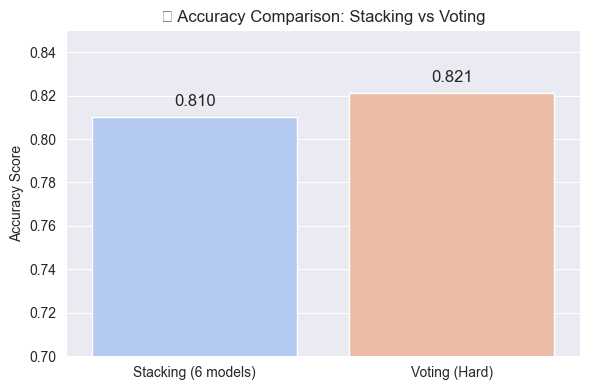

✅ Stacking Accuracy: 0.8100558659217877
✅ Voting Accuracy: 0.8212290502793296


In [684]:
from sklearn.ensemble import StackingClassifier, VotingClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# ✅ Base models for stacking
base_models = [
    ('knn', KNeighborsClassifier(n_neighbors=11, metric='manhattan', weights='uniform')),
    ('dt', DecisionTreeClassifier(max_depth=3, criterion='gini', min_samples_split=2)),
    ('nb', GaussianNB(var_smoothing=1e-09)),
    ('svm', SVC(C=100, gamma=0.01, kernel='rbf', probability=True)),
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('gb', GradientBoostingClassifier(random_state=42))  # ✅ fixed: added missing comma
]

# ✅ Meta-model for stacking
meta_model = LogisticRegression(C=10, solver='liblinear', penalty='l2')

# ✅ Step 1: Stacking Classifier
stack_model = StackingClassifier(
    estimators=base_models,
    final_estimator=meta_model,
    cv=5
)
stack_model.fit(X_train, y_train)
stack_pred = stack_model.predict(X_test)
stack_acc = accuracy_score(y_test, stack_pred)

# ✅ Step 2: Voting Classifier (Hard voting)
vote_model = VotingClassifier(
    estimators=base_models,
    voting='hard'
)
vote_model.fit(X_train, y_train)
vote_pred = vote_model.predict(X_test)
vote_acc = accuracy_score(y_test, vote_pred)

# ✅ Step 3: Plot accuracy comparison
models = ['Stacking (6 models)', 'Voting (Hard)']
accuracies = [stack_acc, vote_acc]

plt.figure(figsize=(6, 4))
sns.barplot(x=models, y=accuracies, palette='coolwarm')
plt.title("🔍 Accuracy Comparison: Stacking vs Voting")
plt.ylabel("Accuracy Score")
plt.ylim(0.7, 0.85)
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.005, f"{acc:.3f}", ha='center', fontsize=12)
plt.tight_layout()
plt.show()

# ✅ Print results
print("✅ Stacking Accuracy:", stack_acc)
print("✅ Voting Accuracy:", vote_acc)


Bagging

In [687]:
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

models = {
    'Logistic Regression': LogisticRegression(C=10, solver='liblinear'),
    'KNN': KNeighborsClassifier(n_neighbors=11, metric='manhattan', weights='uniform'),
    'Decision Tree': DecisionTreeClassifier(max_depth=3, criterion='gini', min_samples_split=2),
    'Naive Bayes': GaussianNB(var_smoothing=1e-09),
    'SVM': SVC(C=100, gamma=0.01, kernel='rbf', probability=True)
}

bagging_results = {}

for name, base_model in models.items():
    bag_model = BaggingClassifier(
        estimator=base_model,      # ✅ changed here
        n_estimators=50,
        random_state=42,
        n_jobs=-1
    )

    bag_model.fit(X_train, y_train)
    y_pred = bag_model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)

    print(f"\n📦 Bagging: {name}")
    print(f"✅ Accuracy: {acc:.4f}")
    print("✅ Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("✅ Classification Report:")
    print(classification_report(y_test, y_pred))

    bagging_results[name] = acc



📦 Bagging: Logistic Regression
✅ Accuracy: 0.7989
✅ Confusion Matrix:
[[90 15]
 [21 53]]
✅ Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.86      0.83       105
           1       0.78      0.72      0.75        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179


📦 Bagging: KNN
✅ Accuracy: 0.8324
✅ Confusion Matrix:
[[92 13]
 [17 57]]
✅ Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.88      0.86       105
           1       0.81      0.77      0.79        74

    accuracy                           0.83       179
   macro avg       0.83      0.82      0.83       179
weighted avg       0.83      0.83      0.83       179


📦 Bagging: Decision Tree
✅ Accuracy: 0.7989
✅ Confusion Matrix:
[[92 13]
 [23 51]]
✅ Classification Report:
              precision

Boosting

In [689]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 1. AdaBoost
ada = AdaBoostClassifier(n_estimators=100, random_state=42)
ada.fit(X_train, y_train)
ada_pred = ada.predict(X_test)
ada_acc = accuracy_score(y_test, ada_pred)
print("📌 AdaBoost:")
print("✅ Accuracy:", ada_acc)
print("✅ Confusion Matrix:\n", confusion_matrix(y_test, ada_pred))
print("✅ Classification Report:\n", classification_report(y_test, ada_pred))

# 2. Gradient Boosting
gb = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb.fit(X_train, y_train)
gb_pred = gb.predict(X_test)
gb_acc = accuracy_score(y_test, gb_pred)
print("\n📌 GradientBoosting:")
print("✅ Accuracy:", gb_acc)
print("✅ Confusion Matrix:\n", confusion_matrix(y_test, gb_pred))
print("✅ Classification Report:\n", classification_report(y_test, gb_pred))

# 3. XGBoost
xgb = XGBClassifier(n_estimators=100, use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)
xgb_acc = accuracy_score(y_test, xgb_pred)
print("\n📌 XGBoost:")
print("✅ Accuracy:", xgb_acc)
print("✅ Confusion Matrix:\n", confusion_matrix(y_test, xgb_pred))
print("✅ Classification Report:\n", classification_report(y_test, xgb_pred))


📌 AdaBoost:
✅ Accuracy: 0.8212290502793296
✅ Confusion Matrix:
 [[90 15]
 [17 57]]
✅ Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.86      0.85       105
           1       0.79      0.77      0.78        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179


📌 GradientBoosting:
✅ Accuracy: 0.8100558659217877
✅ Confusion Matrix:
 [[91 14]
 [20 54]]
✅ Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.87      0.84       105
           1       0.79      0.73      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179


📌 XGBoost:
✅ Accuracy: 0.7988826815642458
✅ Confusion Matrix:
 [[88 17]
 [19 55]]
✅ Classification Report:
           

In [690]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
import numpy as np

# Initialize Models
ada = AdaBoostClassifier(random_state=42)
gb = GradientBoostingClassifier(random_state=42)
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Define models in a list
models = {
    "AdaBoost": ada,
    "GradientBoosting": gb,
    "XGBoost": xgb
}

# Perform 5-fold cross-validation
for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
    print(f"✅ {name} - CV Mean Accuracy: {np.mean(scores):.4f}, Std Dev: {np.std(scores):.4f}")


✅ AdaBoost - CV Mean Accuracy: 0.8193, Std Dev: 0.0155
✅ GradientBoosting - CV Mean Accuracy: 0.8350, Std Dev: 0.0202
✅ XGBoost - CV Mean Accuracy: 0.8193, Std Dev: 0.0327


In [691]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from scipy.stats import uniform, randint

gb_params_random = {
    'n_estimators': randint(50, 200),
    'learning_rate': uniform(0.01, 0.3),
    'max_depth': randint(2, 10),
    'min_samples_split': randint(2, 10)
}

gb_params_grid = {
    'n_estimators': [100, 150, 200],
    'learning_rate': [0.05, 0.1, 0.15],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 4, 6]
}

gb_random = RandomizedSearchCV(
    GradientBoostingClassifier(),
    param_distributions=gb_params_random,
    n_iter=20,
    cv=5,
    random_state=42,
    n_jobs=-1
)
gb_random.fit(X_train, y_train)

print("🎲 Best from RandomizedSearchCV:", gb_random.best_score_)
print("🔧 Best Params:", gb_random.best_params_)

gb_grid = GridSearchCV(
    GradientBoostingClassifier(),
    param_grid=gb_params_grid,
    cv=5,
    n_jobs=-1
)
gb_grid.fit(X_train, y_train)

print("📊 Best from GridSearchCV:", gb_grid.best_score_)
print("🔧 Best Params:", gb_grid.best_params_)


🎲 Best from RandomizedSearchCV: 0.8244262779474049
🔧 Best Params: {'learning_rate': np.float64(0.029515477895583855), 'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 109}
📊 Best from GridSearchCV: 0.8328671328671329
🔧 Best Params: {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_split': 2, 'n_estimators': 150}


In [692]:
pip install lightgbm

   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   -------------- ------------------------- 0.5/1.5 MB 5.5 MB/s eta 0:00:01
   ------------------------------------ --- 1.3/1.5 MB 5.0 MB/s eta 0:00:01
   ---------------------------------------- 1.5/1.5 MB 4.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [693]:
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize and fit
lgb_model = LGBMClassifier(random_state=42)
lgb_model.fit(X_train, y_train)
lgb_pred = lgb_model.predict(X_test)

# Evaluation
print("📌 LightGBM:")
print("✅ Accuracy:", accuracy_score(y_test, lgb_pred))
print("✅ Confusion Matrix:\n", confusion_matrix(y_test, lgb_pred))
print("✅ Classification Report:\n", classification_report(y_test, lgb_pred))

[LightGBM] [Info] Number of positive: 268, number of negative: 444
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000571 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 199
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.376404 -> initscore=-0.504838
[LightGBM] [Info] Start training from score -0.504838
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

In [695]:
pip install catboost

   ---------------------------------------- 0.0/102.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/102.4 MB ? eta -:--:--
   ---------------------------------------- 0.8/102.4 MB 3.3 MB/s eta 0:00:31
   - -------------------------------------- 2.9/102.4 MB 7.6 MB/s eta 0:00:14
   -- ------------------------------------- 6.8/102.4 MB 11.3 MB/s eta 0:00:09
   ---- ----------------------------------- 10.5/102.4 MB 12.7 MB/s eta 0:00:08
   ----- ---------------------------------- 13.1/102.4 MB 12.8 MB/s eta 0:00:07
   ----- ---------------------------------- 14.4/102.4 MB 11.7 MB/s eta 0:00:08
   ------ --------------------------------- 15.5/102.4 MB 11.8 MB/s eta 0:00:08
   ------- -------------------------------- 18.9/102.4 MB 11.6 MB/s eta 0:00:08
   ------- -------------------------------- 19.7/102.4 MB 11.3 MB/s eta 0:00:08
   -------- ------------------------------- 21.8/102.4 MB 10.9 MB/s eta 0:00:08
   --------- ------------------------------ 24.1/102.4 MB 10.7 

In [698]:
from catboost import CatBoostClassifier

# Initialize and fit
cat_model = CatBoostClassifier(verbose=0, random_state=42)
cat_model.fit(X_train, y_train)
cat_pred = cat_model.predict(X_test)

# Evaluation
print("\n📌 CatBoost:")
print("✅ Accuracy:", accuracy_score(y_test, cat_pred))
print("✅ Confusion Matrix:\n", confusion_matrix(y_test, cat_pred))
print("✅ Classification Report:\n", classification_report(y_test, cat_pred))


📌 CatBoost:
✅ Accuracy: 0.8268156424581006
✅ Confusion Matrix:
 [[93 12]
 [19 55]]
✅ Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.89      0.86       105
           1       0.82      0.74      0.78        74

    accuracy                           0.83       179
   macro avg       0.83      0.81      0.82       179
weighted avg       0.83      0.83      0.83       179



In [700]:
from sklearn.model_selection import cross_val_score
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

# LightGBM Model
lgb_model = LGBMClassifier(learning_rate=0.1, max_depth=3, min_child_samples=2, n_estimators=150)
lgb_scores = cross_val_score(lgb_model, X, y, cv=5)

print("✅ LightGBM - CV Mean Accuracy:", round(lgb_scores.mean(), 4))
print("📉 Standard Deviation:", round(lgb_scores.std(), 4))


# CatBoost Model
cat_model = CatBoostClassifier(verbose=0)
cat_cv = cross_val_score(cat_model, X, y, cv=5)
print("✅ CatBoost - CV Mean Accuracy:", round(cat_cv.mean(), 4), "Std Dev:", round(cat_cv.std(), 4))


[LightGBM] [Info] Number of positive: 273, number of negative: 439
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000117 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 207
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.383427 -> initscore=-0.475028
[LightGBM] [Info] Start training from score -0.475028
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

In [701]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

stacking_model = StackingClassifier(
    estimators=[
        ('knn', KNeighborsClassifier(n_neighbors=11)),
        ('dt', DecisionTreeClassifier(max_depth=3)),
        ('nb', GaussianNB()),
        ('svm', SVC(probability=True)),
        ('lgb', LGBMClassifier(learning_rate=0.1, max_depth=3, n_estimators=150))
    ],
    final_estimator=LogisticRegression()
)

stacking_model.fit(X_train, y_train)
stack_pred = stacking_model.predict(X_test)

print("✅ Stacking Accuracy (with LightGBM):", accuracy_score(y_test, stack_pred))


[LightGBM] [Info] Number of positive: 268, number of negative: 444
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000109 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 199
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.376404 -> initscore=-0.504838
[LightGBM] [Info] Start training from score -0.504838
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

In [706]:
from catboost import CatBoostClassifier
from sklearn.model_selection import RandomizedSearchCV

cat_model = CatBoostClassifier(verbose=0)

cat_params = {
    'depth': [3, 4, 5, 6],
    'learning_rate': uniform(0.01, 0.2),
    'iterations': randint(100, 300)
}

cat_random = RandomizedSearchCV(cat_model, cat_params, n_iter=10, cv=5, random_state=42)
cat_random.fit(X_train, y_train)

print("✅ Best CatBoost Accuracy:", cat_random.best_score_)
print("🔧 Best Params:", cat_random.best_params_)


✅ Best CatBoost Accuracy: 0.8370235398404413
🔧 Best Params: {'depth': 5, 'iterations': 187, 'learning_rate': np.float64(0.07674172222780437)}
